# LSGAN



In [1]:
import os
import tensorflow
from tensorflow.keras.layers import Conv2DTranspose,BatchNormalization
from tensorflow.keras.layers import Input,LeakyReLU,Conv2D,Flatten,Dense,Activation,Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np

In [2]:
os.chdir('C:/Users/feher/Documents/Data_Projects/GAN/')
from gan import LSGAN

In [3]:
genSize = (100,)

In [4]:
def buildDisc():
    '''Buid the discriminator'''
    kernel_size = 5
    layer_filters = [32, 64, 128, 256]
    
    
    inputs = Input(shape=(28,28,1)  )
    x = inputs
    for filters in layer_filters:
        if filters == layer_filters[-1]:
            strides = 1
        else:
            strides = 2
        x = LeakyReLU(alpha=0.2)(x)
        x = Conv2D(filters=filters,kernel_size=kernel_size,strides=strides,padding='same')(x)

    x = Flatten()(x)
    # default output is probability that the image is real
    outputs = Dense(1)(x)

    return Model(inputs, outputs, name='discriminator')


discriminator = buildDisc()
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 32)        832       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)       

In [5]:
def buildGen():
    '''Build the generator'''
    # network parameters
    kernel_size = 5
    layer_filters = [128, 64, 32, 1]
    
    inputs = Input(shape=(100,))
    x = inputs

    x = Dense(7 * 7 * layer_filters[0])(x)
    x = Reshape((7, 7, layer_filters[0]))(x)

    for filters in layer_filters:
        if filters > layer_filters[-2]:
            strides = 2
        else:
            strides = 1
        x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = Conv2DTranspose(filters=filters,kernel_size=kernel_size,strides=strides,padding='same')(x)

    x = Activation('sigmoid')(x)

    # generator output is the synthesized image x
    return Model(inputs, x, name='generator')


generator = buildGen()
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
activation (Activation)      (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       51

In [6]:
gan = LSGAN(generator=generator,discriminator=discriminator,DiscrOptimizer=RMSprop(lr=5e-5),GanOptimizer=RMSprop(lr=5e-5))

In [7]:
gan.generateBatchEval()

Success!


In [8]:
import matplotlib.pyplot as plt
def viewMinst(mtr,ep=None,save=True):
    """view minst"""
    path = "D:/Project/DeepLearning/GAN/LSGAN/output/Epoch_{}".format(ep)
    title = "Epoch : {}".format(ep)
    
    mtr2 = np.clip(mtr * 255,0,255).astype('uint8')
    plt.imshow(mtr2.reshape(28,28), cmap='gray')
    
    if ep != None:
        if not os.path.isdir(path):
            os.mkdir(path)
        #plt.title(title)
    if save == True and ep != None:
        i = 0
        while os.path.exists(path + '/Epoch{}_{}.jpg'.format(ep,i)):
            i+=1
        plt.savefig(path + '/Epoch{}_{}.jpg'.format(ep,i))

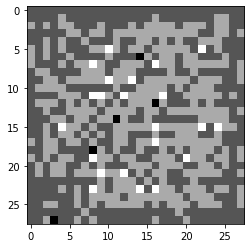

In [9]:
gan.GenerateOutputs(xtest=gan.evaluationInpt ,batchSize=16,viewFunction=viewMinst,returnArray=False,ep=0)

In [10]:
from tensorflow.keras.datasets import mnist
(xtr,_),_ = mnist.load_data()
xtr = xtr.reshape((-1,28,28,1)).astype('float32')/255

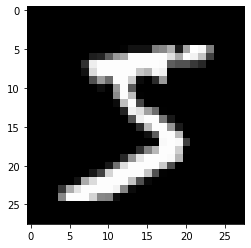

In [11]:
viewMinst(xtr[0],ep=None,save=False)

Epoch 1
117/117 [==============================] - 94s 804ms/step
Discrimiator: (loss,acc)=(0.002762429416179657,1.0)
 	 Adversial: (loss,acc)=(0.0271889790892601,1.0)
Epoch 2
117/117 [==============================] - 96s 822ms/step
Discrimiator: (loss,acc)=(0.17659591138362885,0.6982421875)
 	 Adversial: (loss,acc)=(0.8411511778831482,0.0)
Epoch 3
117/117 [==============================] - 98s 838ms/step
Discrimiator: (loss,acc)=(0.0036571465898305178,0.9990234375)
 	 Adversial: (loss,acc)=(0.00796462595462799,1.0)
Epoch 4
117/117 [==============================] - 100s 855ms/step
Discrimiator: (loss,acc)=(0.014047744683921337,0.9990234375)
 	 Adversial: (loss,acc)=(0.16502059996128082,0.958984375)
Epoch 5
117/117 [==============================] - 101s 861ms/step
Discrimiator: (loss,acc)=(0.003324997378513217,1.0)
 	 Adversial: (loss,acc)=(0.003985229879617691,1.0)
Epoch 6
117/117 [==============================] - 102s 873ms/step
Discrimiator: (loss,acc)=(0.00509960250928998,1.0)
 

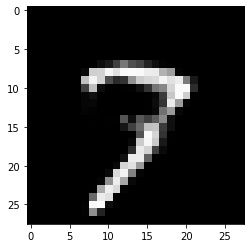

In [12]:
gan.train(x_train = xtr,batch_size = 1024,epoch =30,outputTr = viewMinst,evalStep = 1,pathSave="D:/Project/DeepLearning/GAN/LSGAN/save")

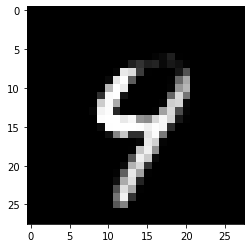

In [13]:
gan.GenerateOutputs(batchSize=1,viewFunction=viewMinst,returnArray=False)